# Principal Component Analysis (PCA) of Basin Characteristics

## Abstract

General patterns are sought in the relative influence of basin characteristics on correlation of daily flow between pairs of basins.  Using a large sample of basins in Canada & CONUS, a set of 18 basin characteristics are evaluated for their individual and combined power to explain the variance in *daily streamflow similarity*, measured by the coefficient of determination ($R^2$) of concurrent data, between all possible basin pair comparisons meeting a minimum selection criteria.  Two *basin distance* metrics are compared as predictor variables for the streamflow similarity metric.  Both metrics are derived from the set of basin characteristics, the first expressed in parameter space to evaluate individual and specific combinations of basin characteristics, and the second in principal component (PC) space to focus on "weighted" combinations of attributes that describe some fraction of variance in the data.  In general, higher $R^2$ of concurrent daily flow is predicted by smaller $L_k$ norm distances in PC and parameter space, and that a few parameters or modes contribute the most predictive information.  The results are used to describe a baseline for interpreting and describing the value of $R^2$ in daily flow regression analysis and runoff estimation for ungauged watersheds.

## Introduction

In their comprehensive survey of streamflow regionalization methods, Razavi and Coulibaly (2013) define two main classes of approaches as model-dependent, corresponding to process-based methods, and model-independent, corresponding to data-driven methods.  In continuous streamflow or runoff prediction in ungauged basins (PUD), both classes of approaches incorporate spatial proximity and physical similarity information.  Model parameters for an unmonitored location of interest are commonly approximated by spatial proximity to nearby monitored locations using kriging or Moran's $l$ (Addor, 2018).  Physical attributes, including topological features, climate indices, and vegetation and soil indices, are used to measure similarity of basins based on characteristics related to drivers of runoff or energy balance.  Model-dependent methods commonly use physical characteristics and spatial proximity to estimate model calibration parameters for unmonitored locations, while model-independent methods use use them in regression methods and scaling relationships.  The focus here is the use of physical attributes in model-independent regression methods.

According to Bloschl (2016), process-based models outperform data-driven models for streamflow predictions in ungauged basins (PUB) where detailed information is available for basin-specific parameter calibration.  However there are limited scenarios where this information can be obtained, and it is difficult and impractical to do so at scale according to Kratzert et al. (2019a, 2019b), who showed that a recurrent neural network (Long Short Term Memory&mdash;LSTM) generally outperformed state-of-the-art conceptual and process-based models in streamflow prediction, even against state-of-the-art process-based models calibrated at the individual basin level.  The study showed that the information content of existing hydrological records is sufficient to predict streamflow in out-of-sample basins with accuracy comparable to or better than the current state-of-the-art process-based models, and the ability to incorporate information content of catchment attributes substantially improves predictive performance.

The information content of catchment characteristics is not evenly distributed for specific questions, rather it has been shown that topological features and climate indices are generally more important than vegetation and soil indices in predictive performance (Kratzert et al. (2019a), Addor et al. (2018)).  Addor et al. (2018) used catchment attributes to simulate prediction of a range of streamflow indices using k-fold cross validation, where the indices were chosen to describe a wide range of rainfall-runoff behaviours.  Streamflow indices are derived from hydrometeorological time series records, for example mean annual flow, runoff ratio, flow duration curve slope, frequency of zero flow, etc.  Kratzert et al. (2019a) 

## Setup and Methods

### Analysis of Catchment Similarity

* daily streamflow similarity is picked because it can be used for a variety of purposes (FDC, peak, drought)

* neither Kratzert or Addor looked at geographic coordinates as characteristics

* follow up the result sentence with how the parameter vs. PC distance combinations compare.  I think it has to do with the number of modes used to explain.  If all modes are used and all parameters are included, the plots are equal, but the parameter space tells more about individual characteristics while PC space finds the best weighted combos of parameters.


### Data

Data used in this analysis are derived from the Hydrometeorological Sandbox - École de technologie supérieure (HYSETS) database (Arsenault et al. 2019).  Two subsets of basins are compared separately and in combination: the HYSETS basins maintained by the Water Survey of Canada (WSC), originating from the HYDAT database, and the subset of CAMELS basins studied in Kratzert et al. (2019a, 2019b).  The HYSETS database includes a larger of basin characteristics not provided in HYSETS, and the set of basin characteristics used here reflects the set of common attributes between the CAMELS and HYDAT subsets of basins. The characteristics are summarized in Table 1 below.

| Parameter | Description | Units | Given or Derived |
|---|---|---|---|
| `Centroid_Lat_deg_N` | Basin centroid latitude coordinate | decimal degrees | given |
| `Centroid_Lon_deg_E` | Basin centroid longitude coordinate | decimal degrees | given |
| `Drainage_Area_km2` | Basin drainage area | $km^2$ | given |
| `Elevation_m` | Median (or mean?) basin elevation | metres above sea level | given |
| `Slope_deg` | Average basin slope | degrees | given |
| `Gravelius` | Basin compactness coefficient | [-] | derived |
| `Perimeter` | Perimeter of catchment boundary | km | derived |
| `Aspect_deg` | Slope orientation related to solar insolation | degrees | given |
| `Land_Use_Forest_frac` | Forested proportion | $/100$ | given |
| `Land_Use_Grass_frac` | Grassland proportion | $/100$ | given |
| `Land_Use_Wetland_frac` | Wetland proportion | $/100$ | given |
| `Land_Use_Water_frac` | Surface water proportion | $/100$ | given |
| `Land_Use_Urban_frac` | Urban land use proportion | $/100$ | given |
| `Land_Use_Shrubs_frac` | Shrub vegetation proportion | $/100$ | given |
| `Land_Use_Crops_frac` | Agriculture/Crops land use proportion | $/100$ | given |
| `Land_Use_Snow_Ice_frac` | Snow and Ice proportion | $/100$ | given |
| `Permeability_logk_m2` | Soil Permeability | $logk$ |  |
| `Porosity_frac` | Soil porosity | $/100$ | given |


* discuss how the basin selection relates to other work?
* discuss selection based on length of record.

### Brief overview of Principal Component Analysis (PCA)

PCA is used to extract uncorrelated modes of variability in the data, on the basis that some more fundamental set of variables exists that describes the data (potentially) more concisely.  These more fundamental variables represent a **linear** transformation of bases (rotation of axes) aligning with the greatest variance in the data.  The first variable, or mode, is the axis of greatest variance in the dataset, and each subsequent mode is orthogonal to all others and represents the direction of greatest *remaining* variance.  

The input dataset for PCA is the matrix constructed of $N$ rows corresponding to unique observations (basins) and $m$ columns corresponding to the parameters of each observation (basin characteristics), represented by the matrix $$\textbf{Y} = \begin{bmatrix}y_{11} & y_{12} & \dots & y_{1m} \\ y_{21} & y_{22} & \dots & y_{2m} \\ \dots & \dots & \dots & \dots \\ y_{N1} & y_{N2} & \dots & y_{Nm} \end{bmatrix}$$

Following the method of Hotelling (1933), the data is standardized such that each variable (column) has zero mean and unit variance.  Given $m$ variables and $N$ samples, the objective is to find a matrix $$\textbf{e} = \begin{bmatrix}e_{11} & e_{12} & \dots & e_{1m} \\ e_{21} & e_{22} & \dots & e_{2m} \\ \dots & \dots & \dots & \dots \\ e_{m1} & e_{m2} & \dots & e_{mm} \end{bmatrix}$$ such that $$\textbf{Y} - \mathbf{\bar{Y}}  = \sum_{j=1}^{m} \textbf{a}_j \textbf{e}_j, \quad j = 1, 2, \dots, m$$  

The eigenvector columns $\textbf{e}_j$ describe the rotated coordinate axes of the PC modes, while the $\textbf{a}_j$ principal component "scores", or the "signal" of each variable, represented in the rotated principal component space.  The modes describe the dynamics of the system in combinations of the original variables, and in descending order of fractional variance, that is the proportional amount of the total variance explained by the mode.  The eigenvectors by definition align with the axis yielding the greatest variance.  While PCA does not guarantee the eigenvector will be aligned meaningfully with the data, this is evaluated by checking that the pairs of principal components are uncorrelated.



### PCA on Basin Characteristics

The set of 18 basin characteristics for a large sample of basins represents a level of dimensionality that is difficult to interpret, and PCA is used to reduce the dimensionality while minimizing information loss.  The eigenvectors can be interpreted as sets of weights applied to the basin characteristics for each mode, and the principal components are the coordinates of the basin characteristics according to the new coordinate system.  Correlation of eigenvalues within each mode can be interpreted as correlation of basin characteristics.

### Runoff Similarity Metric

The similarity of runoff between two basins is expressed as the coefficient of determination ($R^2$) of a linear regression of concurrent daily flows.  There are $22,311$ pairs of basins in AB and BC with a minimum 40 years of *pairwise concurrent* daily flow.  The expected value of $R^2$ for the total sample is approximately 0.2.  The distribution of all $R^2$ values is shown in Figure X.

* should we include a figure showing just the distribution of R^2 and the expected value?

### Basin Distance Metric

The similarity of a pair of basins is referred to as the *basin distance* metric, and this is computed as the $L_k$ norm length of the element-wise difference in basin characteristics (or PC components if these are in fact different than simply the basin characteristics).  The subscript $k$ indicates the generalized metric, where a value of 1 represents the Manhattan distance, 2 represents Euclidean distance, etc.  Several values of k are checked to validate the behaviour of the distance metric in high dimensional space (Aggarwal et al., 2001).  

## Results

### The Basin Distance Metric as a Predictor of Runoff Similarity

Figure X shows a hex-bin density plot of basin distance vs. runoff similarity for all basin pairs.  The expected value of the total sample is plotted as a horizontal dashed line at roughly an $R^2$ of 0.2, while the solid red line represents the expected value as a function of distance metric.  Dividing the dataset into **b** equiprobable bins of roughly **s** points each, the solid red line represents the median $R^2$ value for each bin.  

* change the red line / hexbin plot to box plot where box widths represent the variable bin widths, and the 'whiskers' represent some number of standard deviations from the mean.

## Discussion

The quality of a numerical model is described by how well its predictions correlate with observation.  In hydrology, the $R^2$ based on linear regression of concurrent flow is a common metric used to describe how well synchronized is the timing and volume of runoff in two different rivers.  

### Interpreting the Coefficient of Determination 

The $R^2$ indicating perfect correlation is one, and zero represents total randomness.  In between is a continuum of values that express more when compared at scale.  What exactly does an $R^2$ of 0.74 mean?  What justifies the 0.04 precision when the decision associated with its evaluation is probably closer to binary?  *Yes, this correlation is good enough to use to base my design input on; No, some other method or source of information is required in order to produce a useful value*.  What is the lowest value a scientist or engineer is willing to tolerate, to publish, or to use to form the basis of some decision?  The answer is of course relative to the question being asked of the data.  Relationships between sets of observations are described as *strong* or *weak*, they are *highly*, *fairly well* or *not well* correlated.  If you want to get creative, [there is a website](https://describingwords.io/for/correlation) with *329+ adjectives for correlation, ordered by usage frequency*.  @Moed_2017 offers the sound advice to "*never take a correlation coefficient for granted and never consider merely the numerical outcome.*"

A particularly routine exercise for practitioners in the resource industry is the daily average flow correlation.  Characterization of runoff is often required in ungauged basins.  Long-term records are sought from nearby gauging stations to find the most representative proxy for runoff at the location of interest.  Qualitative comparisons are written to justify choosing one candidate proxy over another.  The comparisons are based on proximity, basin characteristics such as elevation, topography, geology, land use, etc.  Quantitative justification for a proxy is uncommon, because quantitative measures of basin characteristics are often unavailable or are otherwise difficult to determine.  

It has been shown that some basin characteristics are more important than others as far as indicating the strength of the relationship of runoff between two different basins. **(check Kratzert paper for source material)** 

* Can we place the results of Kratzert in context with the results here?  
    * We would need to express similarity as NSE


## Predictive Performance as a function of Minimum Length of Record

* how does the expected value change as a function of record length (i.e. here 40 years is used, but what if analysis is undertaken by concurrence length ranges?  i.e. 1 year, 2, 3, 5, 10, 20, 40 years?  

/home/danbot/Documents/code/data_analysis/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
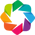

Loading BokehJS ...

In [1]:
import time

import pandas as pd
import numpy as np

from minisom import MiniSom
import somoclu

from itertools import combinations

import matplotlib.pyplot as plt
from multiprocessing import Pool

from shapely.geometry import Point
import geopandas as gpd
import geoviews as gv
from geoviews import opts, tile_sources as gvts

import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA, FastICA

from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.plotting import ColumnDataSource
from bokeh.transform import factor_cmap, factor_mark
from bokeh.palettes import Spectral3
from bokeh.layouts import gridplot, column, row
from bokeh.io import output_file, save, show

import holoviews as hv
from holoviews import opts
from holoviews import dim
hv.extension('bokeh')

output_notebook()

## Do PCA on Characteristics of Individual Basins

Import the results from the "Generate Pairings and Comparisons" notebook, where the HYSETS database is filtered for all HYDAT basins, and a list of basin pairs is generated where the minimum length of concurrence is 365 days.  The number of unique stations is the flattened list of basin pairs, expressed as a unique set of individual basins.

In [3]:
all_pair_results_df = pd.read_pickle('results/filtered_pairs_CAMELS_all_concurrent_lengths.csv')

unique_stations = all_pair_results_df[['b1', 'b2']].to_numpy().flatten()

unique_stations = list(set(unique_stations))
print(f'Analyzing {len(unique_stations)} unique stations.')

Analyzing 642 unique stations.


Retrieve the watershed properties (basin characteristics) from a separate summary file.

In [5]:
# Import the HYSETS
basin_df = pd.read_csv('data/HYSETS_watershed_properties.txt', sep=';', dtype={'Official_ID': str})
# basin_df = basin_df[basin_df['Source'] == 'HYDAT']
basin_df = basin_df[basin_df['Source'] == 'USGS']
basin_df = basin_df[basin_df['Official_ID'].isin(unique_stations)]

Create a list of all the basin characteristics to be used in the analysis.  Filter out any basin pairs that represent basins with incomplete basin characteristics.

In [6]:
basin_pca_cols = [ 'Centroid_Lat_deg_N', 'Centroid_Lon_deg_E', 'Drainage_Area_km2', 'Elevation_m','Slope_deg', 
                  'Gravelius', 'Perimeter', 'Aspect_deg', 'Land_Use_Forest_frac', 'Land_Use_Grass_frac', 
                  'Land_Use_Wetland_frac', 'Land_Use_Water_frac', 'Land_Use_Urban_frac', 'Land_Use_Shrubs_frac', 
                  'Land_Use_Crops_frac', 'Land_Use_Snow_Ice_frac', 'Permeability_logk_m2', 'Porosity_frac']

# exclude any basins that are missing basin characteristics that will be used in 
basins_missing_data = basin_df[basin_df[basin_pca_cols].isnull().any(1)]['Official_ID'].to_numpy()

basin_df = basin_df[~basin_df[basin_pca_cols].isnull().any(1)]

basin_df.reset_index(inplace=True)
basin_df['index'] = basin_df.index


print(f'Analyzing {len(basin_df)} basins.')

Analyzing 642 basins.


In [7]:
# remove the two basins that are missing data.  Not sure how these got in here in the first place, but...
print(len(all_pair_results_df))
print(basins_missing_data)
all_pair_results_df = all_pair_results_df[(~all_pair_results_df['b1'].isin(basins_missing_data)) & (~all_pair_results_df['b2'].isin(basins_missing_data))]
print(len(all_pair_results_df))

205667
[]
205667


In [8]:
# create a dict to map the Official ID to the index for subsequent operations
idx_id_dict = basin_df[['Official_ID', 'index']].set_index('Official_ID').to_dict()['index']

Create a dataframe containing just the basin characteristics, which represents the input matrix $\textbf{Y}$ and standardize it to have 0 mean and standard deviation 1.

In [9]:
# filter for the basin characteristic columns
basin_PCA_df = basin_df[basin_pca_cols].copy()

# standardize the input data
basin_PCA_df = (basin_PCA_df - basin_PCA_df.mean()) / basin_PCA_df.std()

# check mean and stdev are 0 and 1, respectively
# print(basin_PCA_df.mean())
# print(basin_PCA_df.std())
basin_PCA_cols = basin_PCA_df.columns
basin_PCA_cols

Index(['Centroid_Lat_deg_N', 'Centroid_Lon_deg_E', 'Drainage_Area_km2',
       'Elevation_m', 'Slope_deg', 'Gravelius', 'Perimeter', 'Aspect_deg',
       'Land_Use_Forest_frac', 'Land_Use_Grass_frac', 'Land_Use_Wetland_frac',
       'Land_Use_Water_frac', 'Land_Use_Urban_frac', 'Land_Use_Shrubs_frac',
       'Land_Use_Crops_frac', 'Land_Use_Snow_Ice_frac', 'Permeability_logk_m2',
       'Porosity_frac'],
      dtype='object')

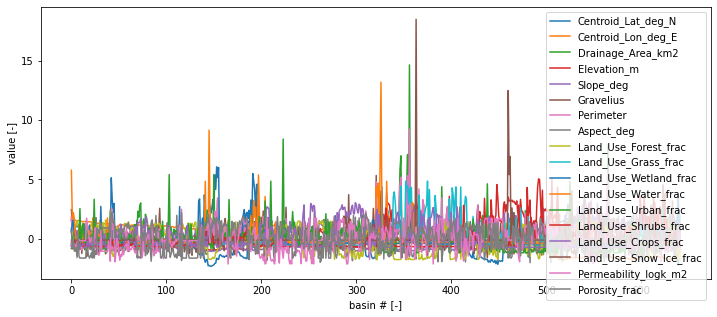

In [10]:
ax = basin_PCA_df.plot(figsize=(12, 5))

ax.set_xlabel('basin # [-]')
ax.set_ylabel('value [-]')
plt.show()

Plot histograms of all of the standardized basin characteristics.  Note the distributions are generally not gaussian.

In [11]:
def create_grid_plot(data):
    j = 0
    figs = []
    for char in data.columns:
        p = figure(plot_width=250, plot_height=250, background_fill_color="#fafafa",
                  title=char)
        x = data[char].to_numpy()
        
        hist, edges = np.histogram(x, density=True, bins='auto')
        
        
        p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
        figs.append(p)
    return figs
            
hist_grid = create_grid_plot(basin_PCA_df)

In [12]:
show(gridplot(hist_grid, ncols=4, plot_width=200, plot_height=130))

Generate the eigenvectors and principal components using the PCA library.

In [13]:
# do PCA 
x = basin_PCA_df.index.values
y = basin_PCA_df.to_numpy()

n_modes = np.shape(y)[1] #dimension of input = 4, so want 4 modes

pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(y)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

In [14]:
print('Input shape = ', np.shape(y))
print('PC shape = ', np.shape(PCs))
print('Eigenvector shape', np.shape(eigvecs))
print('PCA Output Eigenvectors (first):')
print(eigvecs[0])

Input shape =  (642, 18)
PC shape =  (642, 18)
Eigenvector shape (18, 18)
PCA Output Eigenvectors (first):
[-0.13636375  0.30329557  0.17320443 -0.36313518 -0.43832253  0.23862295
  0.23836531 -0.14163673 -0.2799241   0.02208112  0.22141689  0.14508608
  0.26507044 -0.17071262  0.3298885  -0.12072498  0.01565986  0.1721379 ]


In [15]:
# Sort eigenvectors and add labels for the eigenvector plot
def sort_eigenvectors(eigvecs, pca_variables):
    rank_dict = {}
    ev_num = 0
    for ev in eigvecs:
        sorted_evs_idx = ev.argsort()
        sorted_evs = ev[sorted_evs_idx][::-1]
        reordered_pca_vars = np.array(pca_variables)[sorted_evs_idx][::-1]
        rank_dict[ev_num] = {k: v for k, v in zip(reordered_pca_vars, sorted_evs)}
        ev_num += 1
    return rank_dict



In [16]:
rank_dict =  sort_eigenvectors(eigvecs, basin_pca_cols)

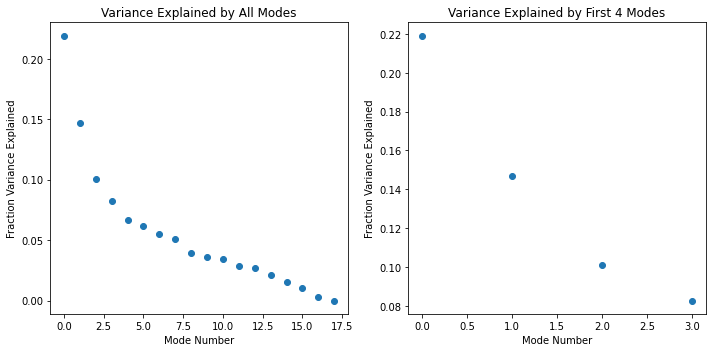

In [17]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 4
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

In [18]:
cumulative_var = 0
for n in range(len(fracVar)):
    cumulative_var += fracVar[n]
    print(f'Mode {n}: {fracVar[n]:.2f} (cumulative {cumulative_var:.2f})')

Mode 0: 0.22 (cumulative 0.22)
Mode 1: 0.15 (cumulative 0.37)
Mode 2: 0.10 (cumulative 0.47)
Mode 3: 0.08 (cumulative 0.55)
Mode 4: 0.07 (cumulative 0.62)
Mode 5: 0.06 (cumulative 0.68)
Mode 6: 0.06 (cumulative 0.73)
Mode 7: 0.05 (cumulative 0.78)
Mode 8: 0.04 (cumulative 0.82)
Mode 9: 0.04 (cumulative 0.86)
Mode 10: 0.03 (cumulative 0.89)
Mode 11: 0.03 (cumulative 0.92)
Mode 12: 0.03 (cumulative 0.95)
Mode 13: 0.02 (cumulative 0.97)
Mode 14: 0.02 (cumulative 0.99)
Mode 15: 0.01 (cumulative 1.00)
Mode 16: 0.00 (cumulative 1.00)
Mode 17: 0.00 (cumulative 1.00)


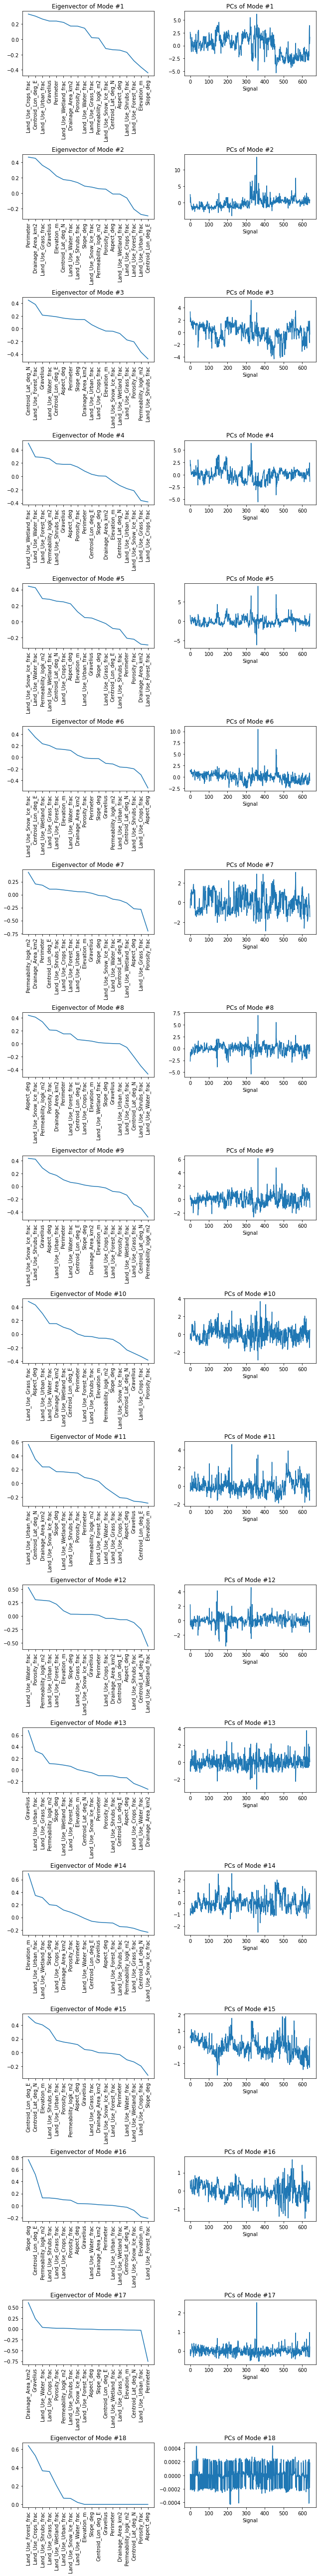

In [19]:
#plot the first n modes and PCs 
n = PCs.shape[1]
plt.rcParams['savefig.facecolor'] = "0.8"
plt.figure(figsize=(9,4*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
#     plt.plot(eigvecs[kk,:])
    plt.plot(rank_dict[kk].keys(), rank_dict[kk].values())
    plt.title(f'Eigenvector of Mode #{kk+1}')
    plt.xticks(rotation=90)
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title(f'PCs of Mode #{kk+1}')
    plt.xlabel('Signal')
    
    plt.tight_layout()
#     plt.savefig('results/img/ordered_eigvecs_characteristics.png', transparent=False)

## View the resulting principal component distributions

Take the PCs matrix and convert to a dataframe, label the columns by their mode number.   Note the resulting PC distributions are much closer to gaussian.

In [20]:
pc_df = pd.DataFrame(PCs, columns=[f'PC {e}' for e in range(PCs.shape[1])])

In [21]:
pca_component_grid = create_grid_plot(pc_df)
show(gridplot(pca_component_grid, ncols=4, plot_width=200, plot_height=130))

Plot regressions of all PC pairs to demonstrate they are not correlated.  

In [22]:
def make_PC_gridplot(PCs, n_modes):
    mode_pairs = list(combinations(list(range(n_modes)), 2))
    figs = []
    for pair in mode_pairs:
        

        p = figure(plot_width=250, plot_height=250, background_fill_color="#fafafa",
                  title=f'{pair}')

        x1 = PCs[:, pair[0]]
        x2 = PCs[:, pair[1]]

        p.circle(x1, x2, alpha=0.5)
        figs.append(p)
    return figs
    
    
pc_space_figs = make_PC_gridplot(PCs, 9)    

In [23]:
show(gridplot(pc_space_figs, ncols=6, plot_width=150, plot_height=130))

## Calculate L_k norm distance of PC scores for basin pairs

Evaluate the distance metric based on various k values to determine the sensitivity of the distance metric.

The general $L_k$ norm distance metric is defined in (Aggarwal et al. 2001) as:

$$ x, y \in \mathcal{R}^d, k \in \mathcal{Z}, L_k(x, y) = \sum_{i=1}^{d} (\Vert x^i - y^i \Vert)^{1/k}$$

This represents how far apart two points (two basins) are in n-dimensional space.  Since PCA only represents a rotation of axes, the distance between points is the same in PC space or in the original untransformed data characteristic space.

In [24]:
def calculate_PC_dist(row, modes, k):
    """
    The calculation of distance is generalized to use any L_k metric.
    i.e. k = 1 is the Manhattan distance,
        k = 2 is the Euclidean, etc.
        k (f) < 1 is the fractional distance (Aggarwal, Hinnegurg & Keim, 2001)
    """
    cols = [f'PC {m}' for m in modes]
    return np.power((row[cols]**k).sum(), 1/k)
    

In [25]:
def filter_dataframe_by_concurrence(cdf, min_concurrence_len=None, max_concurrence_len=None):
    """
    Filter the basin pair dataframe to limit the pairs to those with a specific length 
    of period of concurrence.
    """
    df = cdf.copy()
    
    if min_concurrence_len is not None:
        df = df[df['concurrent_days'] > 364 * min_concurrence_len]
    if max_concurrence_len is not None:
        df = df[df['concurrent_days'] <= 365 * max_concurrence_len]
    
    return df

In [26]:
def distance_metric_basin_pairs(pair, pc_cols, modes, k):
    """
    Calculate the L_k norm (distance metric).
    """
    try:
        diffs = np.absolute(pc_df.loc[idx_id_dict[pair[0]], pc_cols] - pc_df.loc[idx_id_dict[pair[1]], pc_cols])
        return np.power((diffs**k).sum(), 1/k)
    except KeyError:
        print(pair)
        return np.nan

In [30]:
# import the list of basin pairs that meet the filtering criteria described above.
# cdf = pd.read_csv('results/results_HYDAT_min_365d_concurrent.csv')
cdf = pd.read_csv('results/results_CAMELS_min_365d_concurrent.csv')
# cdf = pd.read_csv('results/results_MEX_min_365d_concurrent.csv')

# numeric station IDS in camels and mex set need to be converted to strings from int
# id should is 8 digits long, so zero pad them
cdf['b1'] = [f'{b:08d}' for b in cdf['b1']]
cdf['b2'] = [f'{b:08d}' for b in cdf['b2']]


In [31]:
# filter the full results for only stations fitting concurrent 
# period length requirements
min_concurrence, max_concurrence = 40, None
basin_pair_df = filter_dataframe_by_concurrence(cdf, min_concurrence, max_concurrence)

In [32]:
# add the "official id" as a column to identify the PC score of each basin,
# convert the df to a dict so that the pc scores can be more quickly retrieved for each basin
pc_df['Official_ID'] = basin_df['Official_ID'].copy()
pc_df.head()

PC 0      PC 1      PC 2      PC 3      PC 4      PC 5      PC 6  \
0  2.605595  2.503367  3.347137  2.905461  1.462999  1.469196 -0.533491   
1  1.351437  0.065028  1.692017  1.748470  0.805214  1.111784  0.318625   
2  2.240870  1.639204  2.374472  2.111737  0.026527  1.435252  0.437633   
3  1.026551  0.169539  2.133586  1.186229  0.157957  1.320562  0.494116   
4  0.490875 -0.094335  1.865826  0.749621 -0.307918  1.188134  0.990390   

       PC 7      PC 8      PC 9     PC 10     PC 11     PC 12     PC 13  \
0 -2.682129  0.595550 -0.543631 -0.524099  2.180966 -0.950972 -0.962590   
1 -1.249680  0.060166 -0.137903 -0.566407 -0.652414  0.120730 -1.072194   
2 -0.781789 -0.020180  0.068719  0.364779 -0.383513 -1.067087 -0.482892   
3 -1.626172  0.308017 -0.474578 -0.346851 -0.041372  0.211381 -0.940478   
4 -0.961968  0.023477 -0.442686 -0.082139 -0.524642  0.383683 -0.792298   

      PC 14     PC 15     PC 16     PC 17 Official_ID  
0  0.567602  0.537675 -0.134577  0.000017    01013500  
1  0.664738  0.165961  0.076026 -0.000213    01022500  
2  0.603970  0.117269 -0.261604  0.000014    01030500  
3  0.718622  0.094511 -0.000724 -0.000203    01031500  
4  0.700333  0.301959 -0.135988 -0.000193    01047000

Specify which modes to include in the distance metric calculation, specify the value of k to determine the distance metric used (i.e. k = 1 corresponds to the Manhattan distance, k = 2 corresponds to the Euclidean distance, etc.). 

For evaluating how the expected value changes as a function of the distance metric, divide the data into `n_bins` equiprobable bins.  This value should be guided by the total number of samples.  In the example case, we want roughly 1000 samples per bin, so we use 25 bins as there are roughly 23K basin pairs in the filtered sample.

In [107]:
# create an array of mode numbers to match the PC dataframe column headings,
# but exclude the Official_ID column
pc_cols_all_modes = [col for col in pc_df.columns if 'PC ' in col]

modes_of_interest = list(range(len(basin_PCA_cols)))
# modes_of_interest = list(range(1))
k_measure = 1
n_bins = 200

print(modes_of_interest)

# filter the columns for the modes of interest
pc_columns = [pc_cols_all_modes[m] for m in modes_of_interest]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


Create a dictionary to store the Official ID and the corresponding PC scores for the modes of interest.

Create columns in the basin pair dataframe to contain the vector of PC scores for each basin in the pair.  

These steps help speed up the distance metric calculation.

In [108]:
# create a dict to store the PC scores for the modes of interest specified above.
id_PC_score_dict = {}
for k, v in idx_id_dict.items():
    id_PC_score_dict[k] = list(pc_df.loc[v, pc_columns].to_numpy())

Create the same dictionary structure, but instead of storing PC scores, just store the (standardized) basin characteristics themselves.

In [109]:
std_basin_df = basin_df[basin_PCA_cols]
std_basin_df = (std_basin_df - std_basin_df.min()) / (std_basin_df.max() - std_basin_df.min())
std_basin_df.head()

id_char_score_dict = {}
for k, v in idx_id_dict.items():
    id_char_score_dict[k] = list(std_basin_df.loc[v, basin_PCA_cols].to_numpy())

In [110]:
# now add columns to the basin pair dataframe to store the pc scores as lists
basin_pair_df['b1_PC_vals'] = basin_pair_df['b1'].apply(lambda b: id_PC_score_dict[b])
basin_pair_df['b2_PC_vals'] = basin_pair_df['b2'].apply(lambda b: id_PC_score_dict[b])

# or alternatively don't use the PC scores and use the standardized basin characteristics themselves
basin_pair_df['b1_PARAM_vals'] = basin_pair_df['b1'].apply(lambda b: id_char_score_dict[b])
basin_pair_df['b2_PARAM_vals'] = basin_pair_df['b2'].apply(lambda b: id_char_score_dict[b])

### Select whether you want to analyze norm distance in PC space or parameter space


In [111]:
which_space = 'PARAM' # 'PC' or 'PARAM'
basin_pair_df[[f'b1_{which_space}_vals', f'b2_{which_space}_vals']].head()

b1_PARAM_vals  \
0  [0.9271769791032632, 0.9885312385739365, 0.087...   
1  [0.9271769791032632, 0.9885312385739365, 0.087...   
2  [0.9271769791032632, 0.9885312385739365, 0.087...   
3  [0.9271769791032632, 0.9885312385739365, 0.087...   
5  [0.9271769791032632, 0.9885312385739365, 0.087...   

                                       b2_PARAM_vals  
0  [0.8063991764384701, 1.0, 0.022742815684510996...  
1  [0.8474197373364296, 0.993436582464879, 0.1428...  
2  [0.8324405343217429, 0.975566766094989, 0.0299...  
3  [0.8183927465011885, 0.9642259269681864, 0.035...  
5  [0.7964087877160556, 0.9460756652851113, 0.006...

In [112]:
def calculate_distance_metric(data, modes, which_space, k_measure, normed=False):
    """
    Calculate the L_k distance metric given arrays of PC scores, 
    an array of integers representing the modes of interest,
    and k_measure, a positive integer corresponding to the L_k norm
    method.  Fractional values in (0, 1] are described in Aggarwal et al. 2001.
    """
    b1_label, b2_label = f'b1_{which_space}_vals', f'b2_{which_space}_vals'
    
    data = data[['b1', 'b2', 'similarity', b1_label, b2_label]].copy()
#     print(data.head())
    data['score_diffs'] = data[[b1_label, b2_label]].apply(lambda row: np.abs(np.subtract(row[b1_label], row[b2_label])), axis=1)
#     print(modes)
#     print(data['PC_diffs'])
    # filter the stored array of PC scores by index to isolate the modes specified
    data['filtered_score_diffs'] = [e[modes] for e in data['score_diffs'].to_numpy()]

    # calculate the L_k norm distance
    score_diffs = data['filtered_score_diffs'].apply(lambda x: (x**k_measure).sum()**(1/k_measure))
#     print('')
#     print('norm distance')
#     print(pc_diffs)
    
    # return the PC distances for all basin pairs as a vector and
    # normalize the distance if specified 
    max_range = score_diffs.max() - score_diffs.min()
    
    distance = (score_diffs - score_diffs.min()) / max_range
#     print(len(distance))
    if max_range == 0:
        max_range = [1E-6]
    if normed:
        return distance
    else:    
        return score_diffs.copy()
    

## Visualize the distance metric vs. similarity

For a single case where the modes of interest and distance metric type are specified, compare at the distribution of data points, the expected similarity of the entire sample, and the expected similarity for each range of distance metric values created by the equiprobable binning.

In [113]:
test_df = basin_pair_df.copy()

test_df['distance_metric'] = calculate_distance_metric(test_df, modes_of_interest, which_space, k_measure, normed=True)

n_pairs = len(test_df)
print(f'Checking {n_pairs} basin pairs.')

Checking 135596 basin pairs.


In [114]:
def create_band(data, n_bins):
    """
    Create a dataframe that splits the basin pair distance metric
    into equiprobable bins to express the expected value and variance
    of similarity (R^2) as a function of the distance metric.
    """
        # Use alpha, beta = 0.33, 0.33 according to
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.mquantiles.html
    max_PC_val = data['distance_metric'].max()

    b_edges = st.mstats.mquantiles(data['distance_metric'], np.linspace(0., max_PC_val, n_bins),
                                  alphap=1./3, betap=1./3)
    b_edges = np.where(np.isnan(b_edges), 1, b_edges)
#     print(b_edges)
    
    tdf = pd.DataFrame()
    tdf['bin_edges'] = b_edges

    median_vals, lbound1, hbound1 = [], [], []
    bin_vals, lbound2, hbound2 = [], [], []

    for i in range(1,len(tdf)):
        min_edge = tdf.loc[i-1, 'bin_edges']
        max_edge = tdf.loc[i, 'bin_edges']
        mid_bin = (min_edge + max_edge) / 2
        bin_vals.append(mid_bin)
        grouped_vals = data[(data['distance_metric'] >= min_edge) & (data['distance_metric'] < max_edge)]['similarity']
#         print(f'{len(grouped_vals)} values between {min_edge:.5f} and {max_edge:.5f}')
        
        if len(grouped_vals) < 1:
            median_vals.append(np.nan)
            lbound1.append(np.nan)
            hbound1.append(np.nan)
            lbound2.append(np.nan)
            hbound2.append(np.nan)

        else:
            median_vals.append(np.percentile(grouped_vals, 50))
            lbound1.append(np.percentile(grouped_vals, 5))
            hbound1.append(np.percentile(grouped_vals, 95))
            lbound2.append(np.percentile(grouped_vals, 33.33333))
            hbound2.append(np.percentile(grouped_vals, 66.666667))
            
            
    band = pd.DataFrame()
    band['edge'] = bin_vals

    band['median'] = median_vals
    band['lbnd1'] = lbound1
    band['hbnd1'] = hbound1

    band['lbnd2'] = lbound2
    band['hbnd2'] = hbound2
    
    return band
       

In [115]:
# process the resulting distances into equiprobable bins for plotting
band_df = create_band(test_df[['distance_metric', 'similarity']].copy(), n_bins)

In [116]:
# plot the median value of the entire sample as a horizontal line
ev_line = hv.HLine(np.percentile(test_df['similarity'], 50))

# plot the expected value as a function of the equiprobable bins
# and create a hexbin plot to illustrate the density of points in the space
# instead of plotting many points which requires a lot of memory.
binned_line = hv.Curve(band_df, ['edge', 'median'])
hex_two_distributions = hv.HexTiles(test_df[['distance_metric', 'similarity']].to_numpy())
hex_two_distributions.opts(scale=(dim('Count').norm()*0.5)+0.3, width=500, height=500)

# 
overlay = hex_two_distributions * hv.Bivariate(hex_two_distributions) * ev_line * binned_line

overlay.opts(
    opts.HexTiles(min_count=0, width=800, height=500, tools=['hover'], 
                  title=f'{n_pairs} pairs, {min_concurrence} < Concurrent Period Len. <= {max_concurrence} ({n_bins} equiprob. bins, {n_pairs/n_bins:.0f} samples/bin)',
                  xlabel=f'L_{k_measure} norm Distance of {which_space} Scores', ylabel='Similarity [R^2]'),
    opts.Bivariate(show_legend=False, line_width=3),
    opts.HLine(color='red', line_width=3, line_dash='dashed'),
    opts.Curve(color='red', line_width=3, line_dash='solid')
)

:Overlay
   .HexTiles.I  :HexTiles   [x,y]
   .Bivariate.I :Bivariate   [x,y]   (Density)
   .HLine.I     :HLine   [x,y]
   .Curve.I     :Curve   [edge,median]   (lbnd1,hbnd1,lbnd2,hbnd2)

## Visualize more expected value series

For any combination of modes, and given a distance metric type, plot the expected similarity as a function of normed distance.

In [121]:
# specify which modes to compare
mode_combos = [
              [0], [1], [2], #[3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17]
              [0,1], #[1,2], [2,3], #[3,4], [4,5], [5,6], [6,7], [7,8], [8,9],
              [0,1,2], #[1,2,3], [2,3,4], #[3,4,5], [4,5,6], [5,6,7], [6,7,8], [7,8,9],
              [0,1,2,3], #[1,2,3,4], [2,3,4,5], [3,4,5,6], [4,5,6,7], [5,6,7,8], [6,7,8,9],
              [0,1,2,3,4], #[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7], [4,5,6,7,8], [5,6,7,8,9],
              [0,1,2,3,4,5],# [1,2,3,4,5,6], [2,3,4,5,6,7], [3,4,5,6,7,8], [4,5,6,7,8,9],
              [0,1,2,3,4,5,6], #[1,2,3,4,5,6,7], [2,3,4,5,6,7,8], [3,4,5,6,7,8,9],
              [0,1,2,3,4,5,6,7], #[1,2,3,4,5,6,7,8], [2,3,4,5,6,7,8,9],
              [0,1,2,3,4,5,6,7,8], #[1,2,3,4,5,6,7,8,9],
#               [0,1,2,3,4,5,6,7,8,9,10],
#               [0,1,2,3,4,5,6,7,8,9,10,11],
#               [0,1,2,3,4,5,6,7,8,9,10,11,12],
#               [0,1,2,3,4,5,6,7,8,9,10,11,12,13],
#               [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
#               [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
#               [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
#               [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
              ]

# create dicts to track results
combo_result_dict, lengths_dict = {}, {}

# set the range of concurrent periods to be evaluated
min_conc, max_conc = 40, None
k_measure = 2

for c in mode_combos:
    # create a copy of the basin pair metric to avoid changing the original object
    data = basin_pair_df.copy()
    
    data['distance_metric'] = calculate_distance_metric(data, c, which_space, k_measure, normed=True)
    
    
    lengths_dict[str(c)] = {'n_pairs': len(data),
                            'min_max_conc': (min_conc, max_conc)}
    
    band = create_band(data, n_bins)
    
    combo_result_dict[str(c)] = band

Create label series such that the modes can be plotted next to each expected value line.

In [122]:
# pull together all the lines
line_list = [hv.Path(combo_result_dict[k][['edge', f'median']]) for k, df in combo_result_dict.items()]

# label the lines
label_coords_left = [(-0.0, d.loc[0, 'median']) for k, d in combo_result_dict.items()]
label_coords_right = [(d.loc[len(d)-1, ['edge', 'median']].to_numpy()) for k, d in combo_result_dict.items()]

labels = [e[1:-1] for e in list(combo_result_dict.keys())]

line_labels_left = hv.Labels({('x', 'y'): label_coords_left, 'text': labels}, ['x', 'y'], 'text')
line_labels_right = hv.Labels({('x', 'y'): label_coords_right, 'text': labels}, ['x', 'y'], 'text')

title_info = lengths_dict[list(lengths_dict.keys())[0]]
n_pairs = title_info['n_pairs']
min_dur = title_info['min_max_conc'][0]
max_dur = title_info['min_max_conc'][1]

### Plot all series

In [123]:
ev_line = hv.HLine(np.percentile(basin_pair_df['similarity'], 50))

overlay = line_labels_left * hv.Overlay(line_list) * line_labels_right * ev_line

overlay.opts(
    opts.Labels(text_font_size='8pt'),
    opts.Overlay(width=900, height=600,
              xlabel=f'L_k Distance of PC Scores: k = {k_measure}',
              ylabel='Similarity [R^2]',
              title=f'{n_pairs} pairs, {min_dur} < Concurrent Period Duration <= {max_dur} ({n_bins} equiprobable bins, {n_pairs/n_bins:.0f} samples/bin)',
             ),
    opts.HLine(line_width=4, line_dash='dashed', color='firebrick')
)

# renderer = hv.renderer('bokeh')
# renderer.save(overlay, 'results/img/EV_similarity_vs_PC_diff_distance_curves')


:Overlay
   .Labels.I  :Labels   [x,y]   (text)
   .Path.I    :Path   [edge,median]
   .Path.II   :Path   [edge,median]
   .Path.III  :Path   [edge,median]
   .Path.IV   :Path   [edge,median]
   .Path.V    :Path   [edge,median]
   .Path.VI   :Path   [edge,median]
   .Path.VII  :Path   [edge,median]
   .Path.VIII :Path   [edge,median]
   .Path.IX   :Path   [edge,median]
   .Path.X    :Path   [edge,median]
   .Path.XI   :Path   [edge,median]
   .Labels.II :Labels   [x,y]   (text)
   .HLine.I   :HLine   [x,y]

## ☠ CODE GRAVEYARD BELOW ☠

In [ ]:
hysets_folder = '/media/danbot/T7 Touch/hysets_series/'

In [ ]:
def create_band(rdf, param, n_bins):
       
    if param == 'similarity':
        domain = 'normed_distance'
    else:
        domain = 'similarity'
        
#     hist, bin_edges = np.histogram(rdf[domain], density=True, bin_edges=b_edges)
#     n_samples_per_bin = 200
#     n_bins_100_sample = int(len(rdf) / n_samples_per_bin)
#     b_edges1 = st.mstats.mquantiles(rdf[param], np.linspace(0., 1.0, n_bins_100_sample))
    b_edges = st.mstats.mquantiles(rdf[param], np.linspace(0., 1.0, n_bins))
#     print(b_edges)
    b_edges = np.where(np.isnan(b_edges), 1, b_edges)
#     print(b_edges)
    
    tdf = pd.DataFrame()
    tdf['bin_edges'] = b_edges

    median_vals, lbound1, hbound1 = [], [], []
    bin_vals, lbound2, hbound2 = [], [], []

    for i in range(1,len(tdf)):
        min_edge = tdf.loc[i-1, 'bin_edges']
        max_edge = tdf.loc[i, 'bin_edges']
        mid_bin = (min_edge + max_edge) / 2
        bin_vals.append(mid_bin)
        grouped_vals = rdf[(rdf[param] >= min_edge) & (rdf[param] < max_edge)][domain]
#         print(f'{len(grouped_vals)} values between {min_edge:.5f} and {max_edge:.5f}')
        
        if len(grouped_vals) < 1:
            median_vals.append(np.nan)
            lbound1.append(np.nan)
            hbound1.append(np.nan)
            lbound2.append(np.nan)
            hbound2.append(np.nan)

        else:
            median_vals.append(np.percentile(grouped_vals, 50))
            lbound1.append(np.percentile(grouped_vals, 5))
            hbound1.append(np.percentile(grouped_vals, 95))
            lbound2.append(np.percentile(grouped_vals, 33.33333))
            hbound2.append(np.percentile(grouped_vals, 66.666667))
            
            
    band = pd.DataFrame()
    band['edge'] = bin_vals

    band['median'] = median_vals
    band['lbnd1'] = lbound1
    band['hbnd1'] = hbound1

    band['lbnd2'] = lbound2
    band['hbnd2'] = hbound2
#     print('')
  


    return band
    

In [ ]:
 #output to static HTML file
def create_fig(band, rdf, param):
    
    title = f"Expected similarity metric by equiprobable distance metric binning ({len(rdf)} basin pairs)"
    if param == 'similarity':
        title = f"Expected distance metric by equiprobable similarity metric binning ({len(rdf)} basin pairs)"

    p = figure(plot_width=600, plot_height=550, tools="wheel_zoom,box_zoom,pan,reset,lasso_select",
               title=title,
              match_aspect=True, background_fill_color='#440154')

    p.grid.visible = False
    
#     bins = hexbin(rdf['normed_dist'], rdf['similarity'], 0.05)
#     print(bins)
    
#     cmap = linear_cmap('counts', 'Viridis256', 0, max(bins.counts))

#     h = p.hex_tile(q="q", r="r", size=0.01, line_color=None, source=bins,
#                fill_color=cmap)
    
    p.circle(rdf['normed_distance'], rdf['similarity'], color="white", size=1,
            alpha=0.6)
    
    rdf.dropna(inplace=True)
    
    if param == 'similarity':

        domain = 'normed_distance'
        p.harea(band['lbnd1'], band['hbnd1'], 
                 band['edge'], alpha=0.3, color='white')
        p.harea(band['lbnd2'], band['hbnd2'], 
                 band['edge'], alpha=0.5, color='white')
        
        sim_all = np.percentile(rdf[domain], 50)
        sim_lb1 = np.percentile(rdf[domain], 5)
        sim_lb2 = np.percentile(rdf[domain], 33.33333)
        sim_hb1 = np.percentile(rdf[domain], 95)
        sim_hb1 = np.percentile(rdf[domain], 66.66667)
        
        y_vals = np.linspace(0, 1, 20)
        x_vals = [sim_all for _ in y_vals]
#         print(sim_all)
        p.line(x_vals, y_vals, color='#F012BE', line_width=3, 
              legend_label='EV (all data)', line_dash='dashed')
        
        p.line(band['median'], band['edge'], color='#F012BE', 
               line_width=2, legend_label='EV (bin)')
        
    else:

        domain = 'similarity'
        p.varea(band['edge'], band['lbnd1'], band['hbnd1'], 
                 alpha=0.3, color='white')
        p.varea(band['edge'], band['lbnd2'], band['hbnd2'], 
                 alpha=0.5, color='white')
        
        similarity_all = np.percentile(rdf['normed_distance'], 50)
        

        sim_all = np.percentile(rdf[domain], 50)
        sim_lb1 = np.percentile(rdf[domain], 5)
        sim_lb2 = np.percentile(rdf[domain], 33.33333)
        sim_hb1 = np.percentile(rdf[domain], 95)
        sim_hb1 = np.percentile(rdf[domain], 66.66667)
    
        x_vals = np.linspace(0, 1, 20)
        y_vals = [sim_all for _ in x_vals]
        

        
        p.line(x_vals, y_vals, color='#F012BE', line_width=3,
              legend_label='EV (all data)', line_dash='dashed')
        
        p.line(band['edge'], band['median'], color='#F012BE',
              line_width=2, legend_label='EV (bin)')

#     hover = HoverTool(
#         tooltips=[('distance', '@normed_distance'),
#                  ()],
#         mode='mouse',
#         point_policy='follow_mouse',
#         renderers=[h],
#     )
#     p.add_tools(hover)
        
#     min_d = rdf['normed_distance'].min()
#     max_d = rdf['normed_distance'].max()

    p.xaxis.axis_label = f'Euclidean Distance of Parameter Differences (1 = most dissimilar)'
    p.yaxis.axis_label = f'Similarity Metric (COD/R^2)'
    
    return p

In [ ]:
def create_layout(normed_df, n_bins, modes):
    similarity_df = create_band(normed_df, 'similarity', n_bins).dropna()
    dist_df = create_band(normed_df, 'normed_distance', n_bins).dropna()
    p1 = create_fig(similarity_df, normed_df, 'similarity')
    p2 = create_fig(dist_df, normed_df, 'normed_distance')
#     print(dist_df.head())
    
#     return (dist_df['edge'].to_numpy(), dist_df['median'].to_numpy())
    return row(p1, p2)

In [ ]:
n_bins  = 50

mode = 0 # PC mode

# band = create_band(pair_df, 'normed_distance', n_bins).dropna()

# layout = create_layout(pair_df, 50, 1)

In [ ]:
# show(layout)

## Plot the PC scores in Space

**NOTE:** this is for the station PCs only, not basin pair comparison

In [ ]:
spdf = pc_df.copy()
# spdf.drop(columns=['Unnamed: 0'], inplace=True)

spdf['geometry'] = basin_df.apply(lambda row: Point(row['Centroid_Lon_deg_E'],	row['Centroid_Lat_deg_N']), axis=1)
# spdf['lon'] = basin_df['Centroid_Lon_deg_E']
# spdf['lat'] = basin_df['Centroid_Lat_deg_N']
# gdf = 
# spdf.head()

gdf = gpd.GeoDataFrame(spdf, crs='EPSG:4326')
gdf = gdf.to_crs(3857)
# gdf.head()

In [ ]:
modes_of_interest = [0]

gdf['stn_ID'] = basin_df['Official_ID']
gdf['PC_distance'] = gdf.apply(lambda row: calculate_PC_dist(row, modes_of_interest, 1), axis=1)


# retrieve the centroid lat-lon and convert to shapely Point
points = hv.Points(gdf, vdims=['PC_distance', 'stn_ID'])

# x_range = (spdf.min()['lon'], spdf.max()['lon'])
# y_range = (spdf.min()['lat'], spdf.max()['lat'])

# tl = hv.element.tiles.StamenTerrain().redim.range()

gvts.EsriTerrain.opts(width=900, height=550) * points.opts(color='PC_distance', tools=['hover'], 
                                                           size=4, colorbar=True, 
                                                           title=f'PC score (mode set {modes_of_interest})')

## Now do PCA for station pairs

In [ ]:
cdf = pd.read_csv('results/results_min_365d_concurrent.csv')

In [ ]:
print(type(cdf['pair_midpoint'][0]))

In [ ]:
pair_pca_df = cdf.copy()
pair_pca_chars = [c for c in cdf.columns if c not in ['similarity', 'b1', 'b2', 'concurrent_days', 'pair_midpoint']]
pair_pca_chars

In [ ]:
def do_PCA(df, char_cols):
        
    # standardize to zero mean and unit stdev (but exclude similarity column)
    df.loc[:,char_cols] = (df.loc[:, char_cols] - df.loc[:, char_cols].mean()) / df.loc[:, char_cols].std()

    # do PCA 
    x = df.index.values
    y = df[char_cols].to_numpy()

    n_modes = np.shape(y)[1] #full dimension of input

    pca = PCA(n_components = n_modes)
    PCs = pca.fit_transform(y)
    eigvecs = pca.components_
    fracVar = pca.explained_variance_ratio_
    return PCs, eigvecs, fracVar

In [ ]:
pair_PCs, pair_eigvecs, pair_fracVar = do_PCA(cdf, pair_pca_chars)

In [ ]:
pair_cumulative_var = 0
for n in range(len(pair_fracVar)):
    pair_cumulative_var += pair_fracVar[n]
    print(f'Mode {n}: {pair_fracVar[n]:.2f} (cumulative {pair_cumulative_var:.2f})')

In [ ]:
#plot fraction of variance explained by each mode
n_modes_show = pair_PCs.shape[1]
# pair_eigvec_dict = sort_eigenvectors(pair_eigvecs)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(pair_fracVar)),pair_fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 4
plt.scatter(range(n_modes_show),pair_fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

In [ ]:
#plot the first n modes and PCs for ~90% of variance
n = pair_PCs.shape[1]
pair_rank_dict = sort_eigenvectors(pair_eigvecs, pair_pca_chars)
# plt.rcParams['savefig.facecolor'] = "0.8"
plt.figure(figsize=(9,4*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
#     plt.plot(eigvecs[kk,:])
    plt.plot(pair_rank_dict[kk].keys(), pair_rank_dict[kk].values())
    plt.title(f'Eigenvector of Mode #{kk}')
    plt.xticks(rotation=90)
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(pair_PCs[:,kk])
    plt.title(f'PCs of Mode #{kk}')
    plt.xlabel('Signal')
    
    plt.tight_layout()
    plt.savefig('results/img/ordered_eigvecs_PCscores.png', transparent=False)

In [ ]:
pair_pc_df = pd.DataFrame(pair_PCs, columns=[f'PC {i}' for i in range(pair_PCs.shape[1])])
pair_pc_df['similarity'] = cdf['similarity'].copy()
pair_pc_df.head()


In [ ]:
def update_pair_pc_df(pair_pc_df, modes_of_interest, k):
    
    df = pair_pc_df.copy()
    
    mode_cols = [f'PC {m}' for m in modes_of_interest]

    df['PC_distance'] = np.power(np.absolute(df[mode_cols]**k).sum(1), 1/k)
#     df['PC_distance_norm'] = np.power(np.absolute(df[mode_cols]**k).sum(1), 1/k)

    df['PC_distance_norm'] = (df['PC_distance'] - df['PC_distance'].min()) / (df['PC_distance'].max() - df['PC_distance'].min())
    
    return df

In [ ]:
pair_pc_df = update_pair_pc_df(pair_pc_df, list(range(6)), 1)

In [ ]:
band_df = create_band(pair_pc_df[['PC_distance_norm', 'similarity']], 25)
ev_line = hv.HLine(np.percentile(pair_pc_df['similarity'], 50))
binned_line = hv.Curve(band_df, ['edge', 'median'])
hex_two_distributions = hv.HexTiles(pair_pc_df[['PC_distance_norm', 'similarity']].to_numpy())
hex_two_distributions.opts(scale=(dim('Count').norm()*0.5)+0.3, width=500, height=500)

overlay = hex_two_distributions * hv.Bivariate(hex_two_distributions) * ev_line * binned_line

overlay.opts(
    opts.HexTiles(min_count=0, width=650, height=500, tools=['hover'], 
                  title=f'{len(pair_pc_df)} pairs, min 365 d. concurrent, Modes {modes_of_interest}',
                  xlabel='Euclidean Distance of PC Scores', ylabel='Similarity [R^2]'),
    opts.Bivariate(show_legend=False, line_width=3),
    opts.HLine(color='red', line_width=3, line_dash='dashed'),
    opts.Curve(color='red', line_width=3, line_dash='solid')
)

## Evaluate Many Combinations of Modes

In [ ]:
# mode_combos = [[0], [1], [2], [3], [4], [5], [6],
#                [0,1], [0,2], [0,3], [0,4], [0,5], [0,6],
#                [1,2], [1,3], [1,4], [1,5], [1,6],
#                [2,3], [2,4], [2,5], [2,6],
#                [3,4], [3,5], [3,6],
#                [4,5], [4,6],
#                [5,6],
#                [0,1,2], [0,1,3], [0,2,3], [0,2,4], [0,3,4], [0,1,4],
#                [1,2,3], [1,2,4], [1,3,4], [1,3,5], [1,2,5],
#                [0,1,2,3], [0,2,3,4], [1,2,3,4], [0,3,4,5],
#                [0,1,2,3,4], [0,1,2,3,5], [0,1,2,4,5], [0,1,3,4,5], 
#                [0,1,2,3,4,5], [0,1,2,3,5,6], [0,1,2,4,5,6], [0,1,3,4,5,6], 
#               ]

mode_combos = [
              [0], [1], [2], [3], #[4], [5], #[6], [7], [8], [9],
              [0,1], [1,2], [2,3], #[3,4], [4,5], [5,6], [6,7], [7,8], [8,9],
#               [0,1,2], #[1,2,3], [2,3,4], [3,4,5], [4,5,6], [5,6,7], [6,7,8], [7,8,9],
#               [0,1,2,3], #[1,2,3,4], [2,3,4,5], [3,4,5,6], [4,5,6,7], [5,6,7,8], [6,7,8,9],
#               [0,1,2,3,4], #[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7], [4,5,6,7,8], [5,6,7,8,9],
#               [0,1,2,3,4,5],# [1,2,3,4,5,6], [2,3,4,5,6,7], [3,4,5,6,7,8], [4,5,6,7,8,9],
#               [0,1,2,3,4,5,6], #[1,2,3,4,5,6,7], [2,3,4,5,6,7,8], [3,4,5,6,7,8,9],
#               [0,1,2,3,4,5,6,7], #[1,2,3,4,5,6,7,8], [2,3,4,5,6,7,8,9],
#               [0,1,2,3,4,5,6,7,8], #[1,2,3,4,5,6,7,8,9],
#               [0,1,2,3,4,5,6,7,8,9,10],
#               [0,1,2,3,4,5,6,7,8,9,10,11],
#               [0,1,2,3,4,5,6,7,8,9,10,11,12],
#               [0,1,2,3,4,5,6,7,8,9,10,11,12,13],
#               [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
              ]

combo_result_dict, lengths_dict = {}, {}

# set the range of concurrent periods to be evaluated
min_conc, max_conc = 40, None
n_bins = 50
k_measure = 2
data = filter_dataframe_by_concurrence(cdf, min_conc, max_conc)
median_similarity = data['similarity'].median()

for c in mode_combos:
    
    PCs, eigvecs, fracVar = do_PCA(data, pair_pca_chars)
    
#     print(PCs.shape, len(data))
    
    pc_data = pd.DataFrame(PCs, columns=[f'PC {i}' for i in range(PCs.shape[1])])
#     print(data[data['similarity'].isna()].count())
    pc_df_updated = update_pair_pc_df(pc_data, c, k_measure)
    
#     print(data['similarity'].isna().sum())
#     print(len(data), len(pc_df))
    
    pc_df_updated['similarity'] = list(data['similarity'].to_numpy())
    
    lengths_dict[str(c)] = {'n_pairs': len(pc_df_updated),
                            'min_max_conc': (min_conc, max_conc)}

    band = create_band(pc_df_updated, n_bins)
    combo_result_dict[str(c)] = band

In [ ]:
multi_out_df = pd.DataFrame()
for c in combo_result_dict:
    if multi_out_df.empty:
        multi_out_df[f'edge'] = combo_result_dict[c]['edge'].copy()
    multi_out_df[f'median_{c}'] = combo_result_dict[c]['median'].copy()

In [ ]:
# pull together all the lines
line_list = [hv.Path(combo_result_dict[k][['edge', f'median']]) for k, df in combo_result_dict.items()]

# label the lines
label_coords_left = [(-0.0, d.loc[0, 'median']) for k, d in combo_result_dict.items()]
label_coords_right = [(d.loc[len(d)-1, ['edge', 'median']].to_numpy()) for k, d in combo_result_dict.items()]

labels = [e[1:-1] for e in list(combo_result_dict.keys())]

line_labels_left = hv.Labels({('x', 'y'): label_coords_left, 'text': labels}, ['x', 'y'], 'text')
line_labels_right = hv.Labels({('x', 'y'): label_coords_right, 'text': labels}, ['x', 'y'], 'text')

title_info = lengths_dict[list(lengths_dict.keys())[0]]
n_pairs = title_info['n_pairs']
min_dur = title_info['min_max_conc'][0]
max_dur = title_info['min_max_conc'][1]

In [ ]:
ev_line = hv.HLine(median_similarity)

overlay = line_labels_left * hv.Overlay(line_list) * line_labels_right * ev_line

overlay.opts(
    opts.Labels(text_font_size='8pt'),
    opts.Overlay(width=1200, height=900,
              xlabel=f'L_k Distance of PC Scores: k = {k_measure}', 
              ylabel='Similarity [R^2]',
              title=f'{n_pairs} pairs, {min_dur} < Concurrent Period Duration <= {max_dur} ({n_bins} equiprobable bins, {n_pairs/n_bins:.0f} samples/bin)',
             ),
    opts.HLine(line_width=4, line_dash='dashed', color='firebrick')
)
# renderer = hv.renderer('bokeh')
# renderer.save(overlay, 'results/img/EV_similarity_vs_PC_diff_distance_curves')


In [ ]:

ev_line = hv.HLine(median_similarity)

overlay = line_labels_left * hv.Overlay(line_list) * line_labels_right * ev_line

overlay.opts(
    opts.Labels(text_font_size='8pt'),
    opts.Overlay(width=1200, height=900,
              xlabel=f'L_k Distance of PC Scores: k = {k_measure}', 
              ylabel='Similarity [R^2]',
              title=f'{n_pairs} pairs, {min_dur} < Concurrent Period Duration <= {max_dur} ({n_bins} equiprobable bins, {n_pairs/n_bins:.0f} samples/bin)',
             ),
    opts.HLine(line_width=4, line_dash='dashed', color='firebrick')
)
# renderer = hv.renderer('bokeh')
# renderer.save(overlay, 'results/img/EV_similarity_vs_PC_diff_distance_curves')


## How to Describe the Coefficient of Determination

It has been shown **(citation)** that some basin characteristics are more important than others as far as indicating the strength of the relationship of runoff between two different basins.  

The figures above describe a relationship between basin characteristics and the COD.  Basin characteristics are compared by a distance measure defined by the euclidean distance of the principal component scores over the number of modes describing **X%** of the variance in the data.  The figure above-left suggests that for a basin pairs to have a COD greater than 0.8, the distance measure is beyond 2 standard deviations from the expected value of the entire sample, where the sample is made up of COD values of all possible pairs of station records that have a minimum 40 years of concurrent record.  The expected value is then a baseline of a random selection from all possible proxy basins.

The figure above-right describes the situation where the basin characteristics are known but one or both rivers are ungauged.  The figure suggests that only the smallest of distance measure falls outside of 2 standard deviations from the expected value of all comparisons.  Based on basin characteristics alone, if the distance measure (standard or principal component score) is greater than roughly 0.2, then a random selection of two basins is expected to produce a better correlation.  The distance measure of approximately 0.2 defines a baseline bound of random pair selection.  Note that a random pairing (doesn't appear to be) the same as a random selection of a proxy.  

Can a tool be devised to take as input a set of basin characteristics and output the distribution of COD given all available data?  

-how does the expected value change as a function of record length (i.e. here 40 years is used, but what if analysis is undertaken by concurrence length ranges?  i.e. 1 year, 2, 3, 5, 10, 20, 40 years?  

## Observations & Questions

Selecting shorter concurrent periods tends to yield lower expected $R^2$ curves.  While there is some bias in the computation of $R^2$ as a function of sample size, it is quite small in magnitude

## Run ICA

Find the modes of maximum statistical independence.

In [ ]:
# do ICA using built-in library
x = df.index.values
y = df.to_numpy()

n_modes = np.shape(y)[1] #dimension of input = 4, so want 4 modes

ica = FastICA(n_components=n_modes)
S_ = ica.fit_transform(y)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(y, np.dot(S_, A_.T) + ica.mean_)

# ica = FastICA()
# S_ica_ = ica.fit(y).transform(y)
S_ /= S_.std(axis=0)

In [ ]:
ica_df = pd.DataFrame(S_, columns=[f'IC {e}' for e in range(PCs.shape[1])])
ica_component_grid = create_grid_plot(ica_df)

show(gridplot(ica_component_grid, ncols=4, plot_width=200, plot_height=130))

In [ ]:
ica_space_figs = make_PC_gridplot(S_, 9)
show(gridplot(ica_space_figs, ncols=6, plot_width=200, plot_height=130))

In [ ]:
#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 3
ny = 3

d = y



#make, initialize, and train the SOM
print(d.shape)
som = MiniSom(nx, ny, data.shape[1], sigma=1, learning_rate=0.5) # initialization of (ny x nx) SOM
som.pca_weights_init(data)
som.train_random(data, 100) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

#calculate the BMU of each observation
bmus = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))

# compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

In [ ]:
#visualize
from matplotlib import pylab

fig, ax = plt.subplots(ny, nx, figsize=(2*nx,3*ny))
row, col = 0, 0
for kk in range(nx*ny):   
    indx = inds[kk][1]
    indy = inds[kk][0]
#     plt.imshow(np.reshape(bmu_patterns[indx][indy],(faceH,faceW)).T,cmap='gray')
    ax[col, row].plot(np.reshape(bmu_patterns[indx][indy], (17)).T)
    ax[col, row].set_title('Freq = ' + str(freq[indx][indy]*100)[:4] + '%')

#     ax[col, row].set_ylabel('Precipitation (Normalized)')
#     ax[col, row].set_xlabel('Percentage of Basin Area')
    col += 1
    if col == ny:
        col = 0
        row += 1
    
    
plt.tight_layout()

In [ ]:
#now, loop through and create a range of sizes of SOMs and compare TE and QE 

ny_array = [2,2,3,4,5,4,5,5,6,7,8, 9, 10, 11]
nx_array = [2,3,3,3,3,4,4,5,6,7,8, 9, 10, 11]

QE = []
TE = []
for kk in range(len(ny_array)):
    nx = nx_array[kk]
    ny = ny_array[kk]
    
    #make, initialize, and train the SOM
    data = df.to_numpy()
    som = MiniSom(nx, ny, 17, sigma=0.3, learning_rate=0.4) # initialization of SOM
    som.pca_weights_init(data)
    som.train_random(data, 100) # trains the SOM with 100 iterations

    qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
    bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
    QE.append(som.quantization_error(data)) #quantization error of map
    TE.append(som.topographic_error(data)) #topographic error of map

In [ ]:
#visualize QE and TE (two different y axes)

fig, ax1= plt.subplots()

#QE
color = 'tab:red'
ax1.set_ylabel('QE',color=color)
ax1.plot(QE,color=color)
ax1.tick_params(axis='y',labelcolor=color)

#TE
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('TE',color=color)
ax2.plot(TE,color=color)
ax2.tick_params(axis='y',labelcolor=color)

plt.title('QE and TE for Different Map Sizes')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
nx, ny = 8, 8

som = somoclu.Somoclu(nx, ny, compactsupport=False)
%time som.train(data)

In [ ]:
som.view_component_planes()

In [ ]:
colors = ["red"] * len(data)
colors.extend(["green"] * len(data))
colors.extend(["blue"] * len(data))

In [ ]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=list(range(len(data))))

In [ ]:
som = somoclu.Somoclu(nx, ny, maptype="toroid",
                      compactsupport=False)
som.train(data)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

In [ ]:
som = somoclu.Somoclu(nx, ny, gridtype="hexagonal",
                      compactsupport=False)
som.train(data)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

In [ ]:
som = somoclu.Somoclu(nx, ny, maptype="toroid",
                      compactsupport=False, initialization="pca")
som.train(data)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

In [ ]:
som.cluster()
som.view_umatrix(bestmatches=True)